# Snippet Creator and Hacking Space 

Hacking space. 

Use snippets.py (previously dm.py) or whatever for the code... 

## Provenance

* dm.ipynb renamed snippet_runner.ipynb to coordinate with snippets.py
* Moved into agg project, untracked June 28, 2022
* Created new as Learning_SLY June 23, 2022

In [ ]:
# see the parser
%run aggregate/parser.py

In [11]:
agg.parser.UnderwritingParser.enhance_debugfile()

time: 16 ms (started: 2022-07-07 21:42:59 -04:00)


In [1]:
logger_level(30)
%run -i snippets.py

time: 703 ms (started: 2022-07-07 21:48:18 -04:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [ ]:
# save grammar 
agg.grammar()

# NewCo Re Capital Model

## Effect on the tail of adding cat...really depends on the relative vol of non-cat.

In [5]:
logger_level(30)
%run -i snippets.py 
# %run -i snippets.py parse_tests

time: 0 ns (started: 2022-07-08 14:00:43 -04:00)


In [4]:
porta = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=1)

portb = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma  27000 cv .01 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=2)

time: 3.76 s (started: 2022-07-08 12:45:07 -04:00)


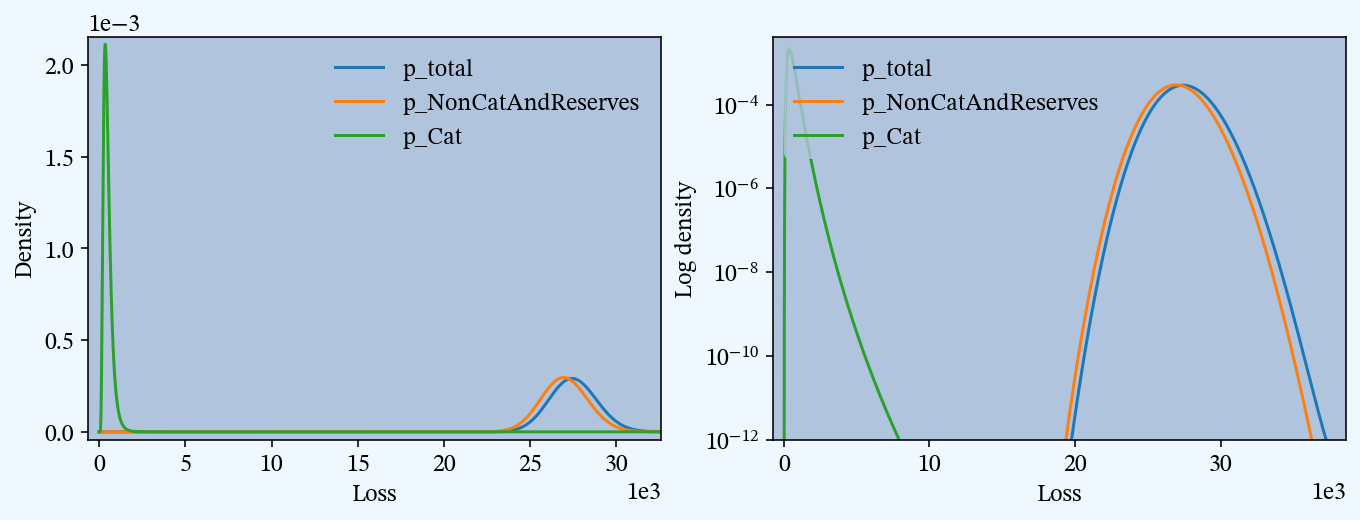

time: 2.55 s (started: 2022-07-08 12:45:12 -04:00)


In [5]:
porta.plot()

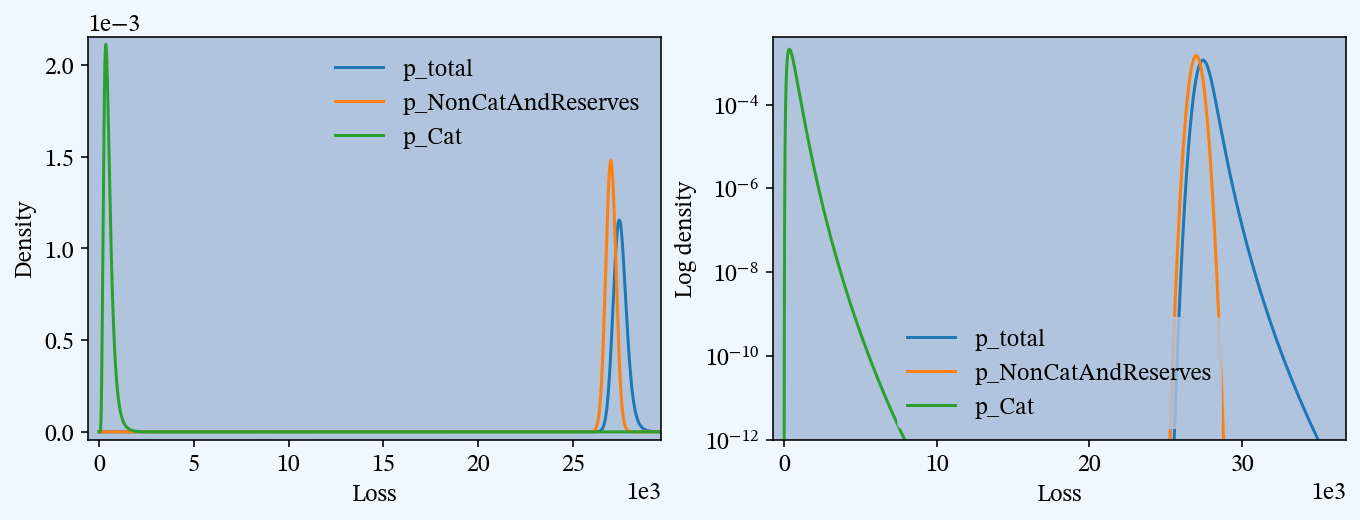

time: 3.02 s (started: 2022-07-08 12:45:15 -04:00)


In [6]:
portb.plot()

In [11]:
cs.enhance_portfolio(porta)
cs.enhance_portfolio(portb)

time: 0 ns (started: 2022-07-08 12:46:21 -04:00)


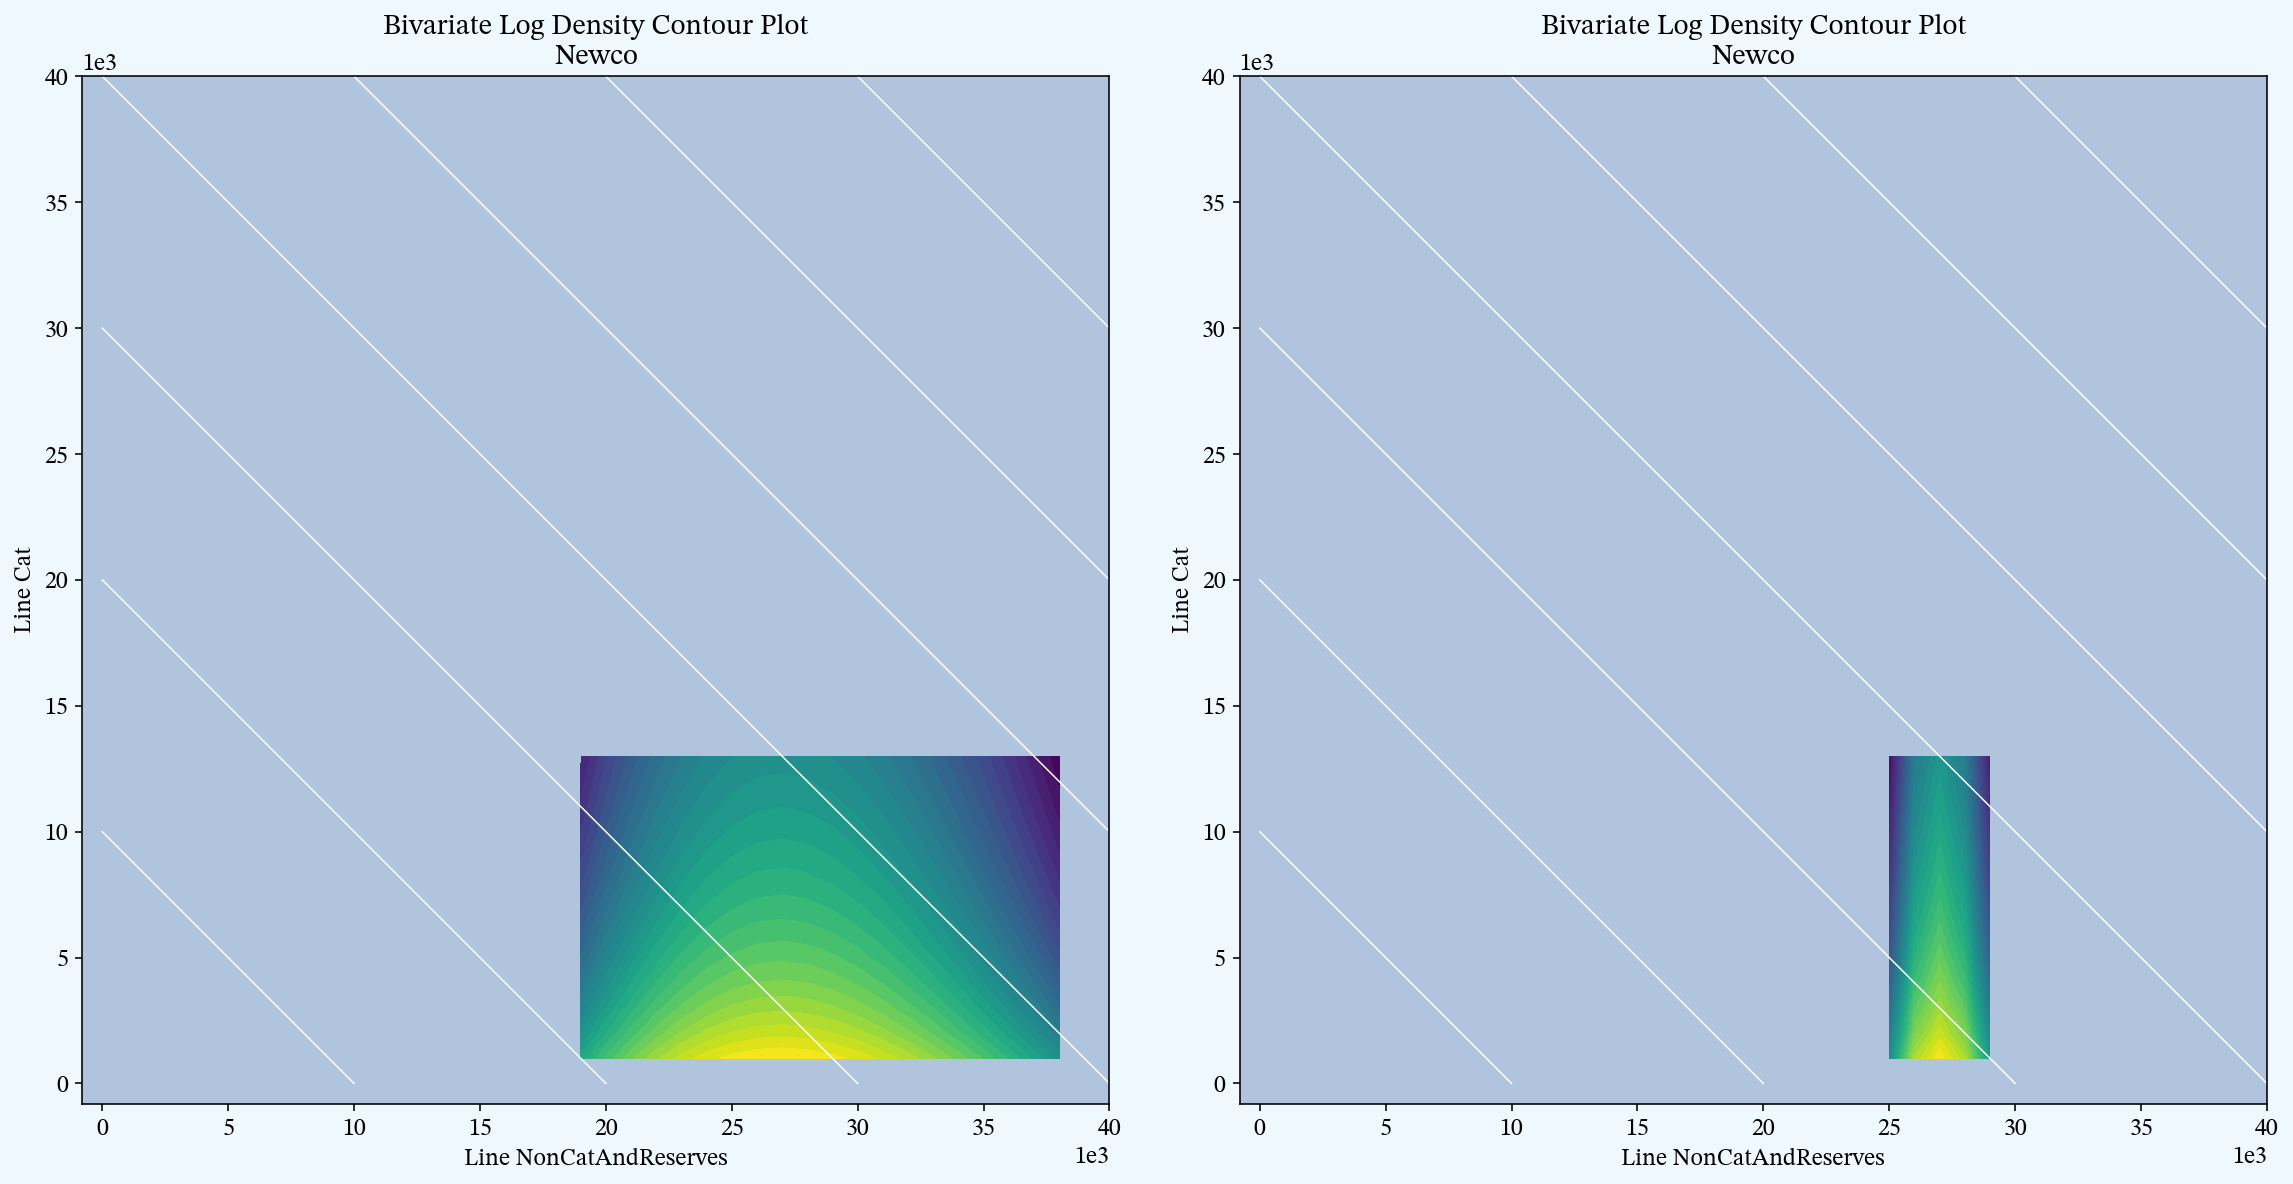

time: 562 ms (started: 2022-07-08 12:46:30 -04:00)


In [12]:
%%sf 1 2 8 8 
porta.biv_contour_plot(f, ax0, 0, 40e3, 1e3, cmap='viridis')
portb.biv_contour_plot(f, ax1, 0, 40e3, 1e3, cmap='viridis')

## Cat / Non-Cat Capital Model Case: New Syntax

In [1]:
logger_level(30)
%run -i snippets.py

hello from aggregate.__init__
All directories exist
time: 1.14 s (started: 2022-07-10 14:55:32 -04:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
prog_noncat = 'agg NC 1 claim sev gamma 6840 cv 0.037 # 19500 fixed'
noncat = build(prog_noncat)
noncat.report_df

view,0,Independent,Mixed,Empirical,Error
statistic,,,,,
Name,NC,NC,NC,,
Limit,inf,inf,inf,,
Attachment,0.000,0.000,0.000,,
Expected Loss,"26,340.000","26,340.000","26,340.000",,
Freqency Mean,1.000,1.000,1.000,,
Freqency CV,0.000,0.000,0.000,,
Freqency Skewness,,,,,
Severity Mean,"26,340.000","26,340.000","26,340.000","26,339.101",-0.000
Severity CV,0.010,0.010,0.010,0.010,-0.006


time: 281 ms (started: 2022-07-10 14:55:33 -04:00)


In [3]:
prog_cat_gross = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.4'
cat = build(prog_cat_gross, log2=18, bs=1)
cat.report_df

55:45.615|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
55:45.616|3111|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
55:46.168|3117|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.


view,0,1,Independent,Mixed,Empirical,Error
statistic,,,,,,
Name,CAT,CAT,CAT,CAT,,
Limit,inf,inf,inf,inf,,
Attachment,0.000,0.000,0.000,0.000,,
Expected Loss,"1,045.760",200.000,"1,245.760","1,245.760",,
Freqency Mean,26.144,2.000,28.144,28.144,,
Freqency CV,0.445,0.812,0.418,0.442,,
Freqency Skewness,0.805,1.009,0.784,0.804,,
Severity Mean,40.000,100.000,44.264,44.264,44.264,0.000
Severity CV,1.700,2.500,2.140,2.140,2.140,-0.000


time: 1.3 s (started: 2022-07-10 14:55:45 -04:00)


In [4]:
prog_cat_net = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.4 aggregate net of 1325 xs 2000'
net = build(prog_cat_net, log2=18, bs=1)
net.report_df

55:54.137|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
55:54.138|3111|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
55:54.605|3117|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.


view,0,1,Independent,Mixed,Empirical,Error
statistic,,,,,,
Name,CAT,CAT,CAT,CAT,,
Limit,inf,inf,inf,inf,,
Attachment,0.000,0.000,0.000,0.000,,
Expected Loss,"1,045.760",200.000,"1,245.760","1,245.760",,
Freqency Mean,26.144,2.000,28.144,28.144,,
Freqency CV,0.445,0.812,0.418,0.442,,
Freqency Skewness,0.805,1.009,0.784,0.804,,
Severity Mean,40.000,100.000,44.264,44.264,42.143,-0.048
Severity CV,1.700,2.500,2.140,2.140,1.744,-0.185


time: 1.44 s (started: 2022-07-10 14:55:53 -04:00)


In [5]:
cat.q(0.9),cat.q(0.99), cat.q(0.996), cat.q(0.999), net.q(0.9), net.q(0.99), net.q(0.996), net.q(0.999)

(2170.0, 3600.0, 4294.0, 5761.0, 2000.0, 2000.0, 2262.0, 3358.0)

time: 1.23 s (started: 2022-07-10 14:55:58 -04:00)


In [15]:
catco = cs.CaseStudy()
catco.factory(case_id='CatCo',
                   case_name='CatCo Capital Model',
                   case_description='CatCo capital model calibrated to S&P',
                   a_distribution       = prog_noncat,
                   b_distribution_gross = prog_cat_gross,
                   b_distribution_net   = prog_cat_net,
                   reg_p=0.99995,      # backed into number so the net capital is correct
                   roe=0.085,
                   d2tc=0.281118428,    # to get about the right amount of debt
                   f_discrete=False, 
                   f_blend_extend=True,
                   bs=1,
                   log2=18,
                   padding=1)
catco.to_json();

37:16.713|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
37:16.714|3111|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
37:17.301|3117|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.
37:20.501|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
37:20.502|3111|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm 

time: 12 s (started: 2022-07-10 15:37:15 -04:00)


In [21]:
catco.blend_d.df

,s,gs
0,30.000u,35.151m
1,50.000u,37.211m
2,100.000u,42.324m
3,200.000u,42.747m
4,129.408m,422.059m


time: 16 ms (started: 2022-07-10 15:52:04 -04:00)


In [22]:
d = catco.make_blend()

time: 188 ms (started: 2022-07-10 15:52:49 -04:00)


In [30]:
build.logger_level(20)

time: 0 ns (started: 2022-07-10 15:58:55 -04:00)


In [36]:
d = catco.make_blend()
d.df

00:24.228|1192|INFO      | aggregate, make_blend|  Calibrating to premium of 28493.4 at assets 39175.0.
00:24.254|1253|INFO      | aggregate, make_blend|  starting premium 28079.0	target=28493.4 @ 0.060%
00:24.254|1255|INFO      | aggregate, make_blend|    i       fx        	s          	fxp
00:24.256|1256|INFO      | aggregate, make_blend|    0	-414.410	0.000600	17315.857
00:24.256|1263|INFO      | aggregate, make_blend|    0	-414.410	0.000600	17315.857
00:24.288|1263|INFO      | aggregate, make_blend|    1	-236.435	0.024532	4942.573
00:24.314|1263|INFO      | aggregate, make_blend|    2	 -79.692	0.072369	2142.363
00:24.337|1263|INFO      | aggregate, make_blend|    3	 -19.263	0.109567	1194.986
00:24.365|1263|INFO      | aggregate, make_blend|    4	  -2.336	0.125687	 915.799
00:24.391|1263|INFO      | aggregate, make_blend|    5	  -0.052	0.128238	 875.187
00:24.418|1263|INFO      | aggregate, make_blend|    6	  -0.000	0.128297	 874.940
00:24.445|1269|INFO      | aggregate, make_blend| 

,s,gs
0,30.000u,35.151m
1,50.000u,37.211m
2,100.000u,42.324m
3,200.000u,42.747m
4,128.297m,419.792m


time: 218 ms (started: 2022-07-10 16:00:24 -04:00)


In [46]:
catco.cap_table

Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
AA,2.283k,62.134m,34.460k,99.972u,36.743k,49.993u,1.000
AA-,117.086,3.187m,34.343k,104.047u,34.460k,99.972u,937.866m
Equity,6.138k,167.040m,28.205k,126.929m,34.343k,104.047u,934.679m
Margin,725.699,19.751m,27.480k,475.058m,28.205k,126.929m,767.639m
EL,27.480k,747.889m,0.000,1.000,27.480k,475.058m,747.889m


time: 15 ms (started: 2022-07-10 17:11:47 -04:00)


In [47]:
port = catco.net

time: 0 ns (started: 2022-07-10 17:23:03 -04:00)


In [70]:
catco.cap_table

Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
AA,2.283k,62.134m,34.460k,99.972u,36.743k,49.993u,1.000
AA-,117.086,3.187m,34.343k,104.047u,34.460k,99.972u,937.866m
Equity,6.138k,167.040m,28.205k,126.929m,34.343k,104.047u,934.679m
Margin,725.699,19.751m,27.480k,475.058m,28.205k,126.929m,767.639m
EL,27.480k,747.889m,0.000,1.000,27.480k,475.058m,747.889m


time: 15 ms (started: 2022-07-10 17:38:10 -04:00)


In [50]:
a = catco.pricing_summary.loc['a', 'net']

time: 0 ns (started: 2022-07-10 17:23:26 -04:00)


In [53]:
el, p, m, q = port.augmented_df.loc[a, ['T.L_total', 'T.P_total', 'T.M_total', 'T.Q_total']]

time: 0 ns (started: 2022-07-10 17:25:04 -04:00)


In [68]:
total_renamer = {'F': 'Adequacy',
                 'capital': 'Capital',
                 'exa_total': 'Loss',
                 'exag_total': 'Premium',
                 'margin': 'Margin',
                 'lr': 'LR',
                 'coc': 'CoC',
                 'loss': 'Assets'}
d2tc = 0.198
debt = d2tc * q
eq = q - debt
bit = port.augmented_df.loc[[port.snap(i) for i in [el, p, p+eq, a]],
                         ['loss', 'F', 'exa_total', 'exag_total']].sort_index(ascending=False)

time: 16 ms (started: 2022-07-10 17:36:05 -04:00)


In [69]:
bit['lr'] = bit.exa_total / bit.exag_total
bit['margin'] = (bit.exag_total - bit.exa_total)
bit['capital'] = bit.loss - bit.exag_total
bit['coc'] = bit.margin / bit.capital
bit['Discount'] = bit.coc / (1 + bit.coc)
# leverage here does not make sense because of reserves
bit.index = ['Debt', 'Equity', 'Premium', 'Loss']
bit = bit.rename(columns=total_renamer)
bit

,Assets,Adequacy,Loss,Premium,LR,Margin,Capital,CoC,Discount
Debt,36.743k,999.950m,27.480k,28.153k,976.096m,672.970,8.590k,78.340m,72.649m
Equity,35.042k,999.917m,27.480k,28.087k,978.380m,607.249,6.955k,87.309m,80.298m
Premium,28.153k,853.586m,27.439k,27.679k,991.329m,239.999,473.962,506.367m,336.151m
Loss,27.480k,525.553m,27.239k,27.320k,997.034m,81.039,160.040,506.367m,336.151m


time: 16 ms (started: 2022-07-10 17:36:05 -04:00)


<AxesSubplot:title={'center':'blend'}>

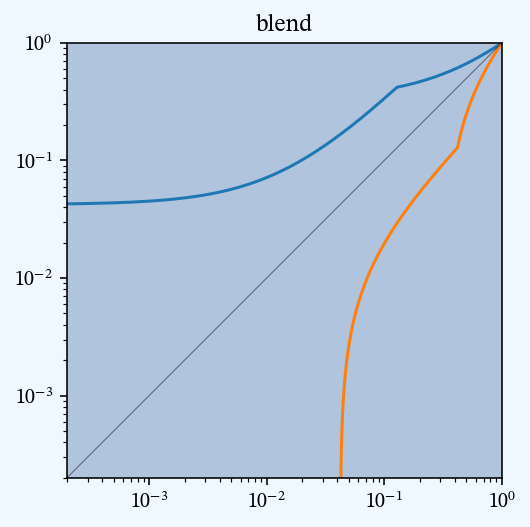

time: 594 ms (started: 2022-07-10 16:03:16 -04:00)


In [45]:
d.plot(scale='return')

In [72]:
self = catco
port = catco.gross
kind = 'gross'

time: 0 ns (started: 2022-07-10 17:42:19 -04:00)


In [105]:
self.make_cap_table('net')

time: 47 ms (started: 2022-07-10 20:33:33 -04:00)


In [106]:
for t in [self.cap_table, self.cap_table_total, self.cap_table_marginal]:
    display(t)

Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
Debt,2.400k,65.319m,34.343k,104.011u,36.743k,49.993u,1.000
Equity,6.138k,167.052m,28.205k,126.929m,34.343k,104.011u,934.681m
Premium,725.000,19.732m,27.480k,474.447m,28.205k,126.929m,767.629m
Loss,27.480k,747.898m,0.000,1.000,27.480k,474.447m,747.898m


,Assets,Adequacy,Loss,Premium,LR,Margin,Capital,CoC,Discount
Tranche,,,,,,,,,
Debt,36.743k,999.950m,27.480k,28.153k,976.096m,672.970,8.590k,78.340m,72.649m
Equity,34.343k,999.896m,27.479k,28.058k,979.390m,578.267,6.285k,92.004m,84.252m
Premium,28.205k,873.071m,27.446k,27.701k,990.792m,255.072,503.777,506.319m,336.130m
Loss,27.480k,525.553m,27.239k,27.320k,997.034m,81.039,160.040,506.367m,336.151m


,Assets,Adequacy,Loss,Premium,LR,Margin,Capital,CoC,Discount
Tranche,,,,,,,,,
Debt,2.400k,54.018u,174.710m,94.878,1.841m,94.703,2.305k,41.084m,39.463m
Equity,6.138k,126.825m,33.342,356.537,93.516m,323.195,5.781k,55.902m,52.942m
Premium,725.000,347.518m,207.231,381.263,543.537m,174.033,343.737,506.296m,336.120m
Loss,27.480k,525.553m,27.239k,27.320k,997.034m,81.039,160.040,506.367m,336.151m
Total,36.743k,999.950m,27.480k,28.153k,976.096m,672.970,8.590k,78.340m,72.649m


time: 31 ms (started: 2022-07-10 20:33:41 -04:00)


In [80]:
        # debt to total capital limit
        a, premium, el = self.pricing_summary.loc[['a', 'P', 'L'], kind]
        capital = a - premium
        debt = self.d2tc * capital
        equity = capital - debt
        debt_attach = a - debt
        prob_debt_attach = port.sf(debt_attach)
        bit = port.density_df.loc[[port.snap(i) for i in [a, premium+equity, premium, el]], ['loss', 'F', 'S']]
        bit

,loss,F,S
39.175k,39.175k,999.950m,49.999u
36.172k,36.172k,999.871m,129.351u
28.493k,28.493k,888.190m,111.810m
27.586k,27.586k,568.435m,431.565m


time: 31 ms (started: 2022-07-10 20:08:09 -04:00)


In [99]:
        cap_table = port.density_df.loc[[port.snap(i) for i in [a, premium+equity, premium, el]],
                                  ['loss', 'F', 'S']]
        cap_table['Amount'] = -np.diff(cap_table.loss, append=0)
        # add prob attaches
        cap_table['Pct Assets'] = cap_table.Amount / cap_table.iloc[0, 0]
        cap_table['Cumul Pct'] = cap_table.loss / cap_table.iloc[0, 0]
        cap_table['Attaches'] = cap_table.loss.shift(-1, fill_value=0)
        cap_table = cap_table.rename(columns={'loss': 'Exhausts', 'S': 'Pr Attaches'})
        cap_table['Pr Attaches'] = cap_table['Pr Attaches'].shift(-1, fill_value=1) 
        cap_table['Pr Exhausts'] = [port.sf(i) for i in cap_table.Exhausts]
        cap_table = cap_table[
            ['Amount', 'Pct Assets', 'Attaches', 'Pr Attaches', 'Exhausts', 'Pr Exhausts', 'Cumul Pct']]
        cap_table.index = ['Debt', 'Equity', 'Premium', 'Loss']
        cap_table.columns.name = 'Quantity'
        cap_table.index.name = 'Tranche'
        cap_table

Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
Debt,3.003k,76.656m,36.172k,129.351u,39.175k,49.999u,1.000
Equity,7.679k,196.018m,28.493k,111.810m,36.172k,129.352u,923.344m
Premium,907.000,23.153m,27.586k,431.565m,28.493k,111.810m,727.326m
Loss,27.586k,704.174m,0.000,1.000,27.586k,431.565m,704.174m


time: 31 ms (started: 2022-07-10 20:20:30 -04:00)


In [75]:
self.cap_table

Quantity,Amount,Pct Assets,Attaches,Pr Attaches,Exhausts,Pr Exhausts,Cumul Pct
Tranche,,,,,,,
AA,2.283k,62.134m,34.460k,99.972u,36.743k,49.993u,1.000
AA-,117.086,3.187m,34.343k,104.047u,34.460k,99.972u,937.866m
Equity,6.138k,167.040m,28.205k,126.929m,34.343k,104.047u,934.679m
Margin,725.699,19.751m,27.480k,475.058m,28.205k,126.929m,767.639m
EL,27.480k,747.889m,0.000,1.000,27.480k,475.058m,747.889m


time: 15 ms (started: 2022-07-10 17:42:55 -04:00)


In [37]:
catco.gross.apply_distortion(d)

           Item                                   Type
0  augmented_df  <class 'pandas.core.frame.DataFrame'>
1  f_distortion                     <class 'NoneType'>
2      f_byline                     <class 'NoneType'>
3     f_bylineg                     <class 'NoneType'>
4        f_exas                     <class 'NoneType'>

time: 1.03 s (started: 2022-07-10 16:00:35 -04:00)


In [39]:
a = catco.pricing_summary.loc['a', 'gross']
a

39175.0

time: 0 ns (started: 2022-07-10 16:01:04 -04:00)


In [42]:
catco.gross.augmented_df.loc[a, ['exa_total', 'exag_total']].to_frame().style

,39175.0
exa_total,27585.514634
exag_total,28493.446668


time: 16 ms (started: 2022-07-10 16:01:38 -04:00)


In [35]:
catco.pricing_summary

portfolio,gross,net
stat,,
L,27.586k,27.480k
M,907.932,725.699
P,28.493k,28.205k
LR,968.135m,974.271m
Q,10.682k,8.538k
ROE,85.000m,85.000m
a,39.175k,36.743k
PQ,2.668,3.304


time: 15 ms (started: 2022-07-10 15:59:49 -04:00)


In [32]:
d.df

,s,gs
0,30.000u,35.151m
1,50.000u,37.211m
2,100.000u,42.324m
3,200.000u,42.747m
4,128.297m,419.792m


time: 0 ns (started: 2022-07-10 15:59:29 -04:00)


In [24]:
catco.full_monty()

53:10.674|2496|Level 35  | aggregate, make_all|  boundss and pstar done
53:10.783|2519|WARNING   | aggregate.port, calibrate_distortion|  Portfolio.calibrate_distortion | Questionable convergenge! tvar, target 28493.446667553842 error 0.00013184792987885885, 200 iterations
53:11.575|2499|Level 35  | aggregate, make_all|  classic pricing done


Esscher Failed to converge after 50 iterations, value is 6.0203560105856985e-05.


53:12.406|2502|Level 35  | aggregate, make_all|  modern monoline done
53:30.141|2505|Level 35  | aggregate, make_all|  ad comps done
53:32.150|2508|Level 35  | aggregate, make_all|  apply distortions done
53:32.491|2511|Level 35  | aggregate, make_all|  Bodoff exhibits done
53:41.201|1955|WARNING   | aggregate, show_graphs|  Check scales are reasonable...


time: 1min 11s (started: 2022-07-10 15:53:10 -04:00)


In [25]:
mrr = cs.ManualRenderResults(catco)

time: 0 ns (started: 2022-07-10 15:54:22 -04:00)


In [26]:
# custom for this analysis
mrr.render_custom('F', 'A', 'N', 'M', 'O', 'V', 'E', 'Z-TR*', 'B')

time: 16 ms (started: 2022-07-10 15:54:22 -04:00)


In [19]:
catco.show_tranching_graph('net', style='old')

time: 1.52 s (started: 2022-07-10 15:38:43 -04:00)


# Define severity as a mixture?

In [13]:
out = build('sev Atest [10 100 1000] @ expon 1 wts=3')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

time: 31 ms (started: 2022-07-08 12:47:57 -04:00)


time: 0 ns (started: 2022-07-08 13:52:13 -04:00)


In [37]:
out = build('agg A dfreq [1] dsev [1 2 34]')

time: 15 ms (started: 2022-07-08 13:51:46 -04:00)


In [34]:
type(build)

aggregate.underwriter.Underwriter

time: 16 ms (started: 2022-07-08 13:50:30 -04:00)


In [35]:
build['A']

('agg',
 'A',
 {'name': 'A',
  'freq_name': 'empirical',
  'freq_a': array([         1]),
  'freq_b': array([         1]),
  'exp_en': -1,
  'sev_name': 'dhistogram',
  'sev_xs': array([         1,          2,         34]),
  'sev_ps': array([   0.33333,    0.33333,    0.33333]),
  'note': ''},
 'agg A dfreq  [1]  dsev  [1 2 34]')

time: 16 ms (started: 2022-07-08 13:50:32 -04:00)
